# Introduction 
- Notebook này chủ yếu tìm hiểu về những khái niệm cơ bản nhất trong việc phân tích dữ liệu Time series
- Trong khuôn khổ một bài viết mang tính tổng quan (mới học) chủ yếu các bài tham khảo đến từ các blog, website nhằm đưa ra một cái nhìn nhanh nhất và toàn diện về lĩnh vược :V 
 

In [2]:
import numpy as np 
import talib as ta 
import pandas as pd 
import matplotlib.pyplot as plt

- Time series là kiểu dữ liệu theo một chuỗi thời gian hay dữ liệu phụ thuộc vào thời gian (ngày, tháng năm, giờ,...). Một số ví dụ cụ thể có thể là dữ liệu về nhiệt độ trong ngày, tháng, dữ liệu về giá cổ phiểu, chứng khoán
- Phân tích dữ liệu time series (TSA) tức là phân tích dữ liệu kiểu này nhằm mục đích : 
    1. Hiểu cách dữ liệu hoạt động và những nhân tố ảnh hưởng tới giá trị của nó tại nhiều điểm trong một khoảng thời gian 
    2. Hỗ trợ cho việc dự đoán giá trị tương lai

- Một số khái niệm trong TSA: 
    1. Trend : dùng để miêu tả giá trị tăng hoặc giảm trong khoảng thời gian liên tục 
    2. Seasonality : sự lặp đi lặp lại của giá trị trong một khoảng thời gian cố định (thường là năm) ví dụ như trong khoảng 1 năm, doanh thu của công ty bán kem sẽ cao vào mùa hè 
    3. Unexpected events (irregularity): sự kiện xảy ra bất ngờ, không thể nắm bắt được, thay đổi một cách đột biến
    4. Cyclic : sự kiện thay đổi lặp đi lặp lại theo chiều hướng lên xong lại xuống và ngược lại

    ![Local Image](../Image/39815Components%20of%20Time%20Series%20Analysis.png)

# Data
- Sử dụng tập dữ liệu WTI Crude Oil trong khoảng từ 1/1/2010 - 31/12/2023 
- Dữ liệu được lấy từ [Insvesting.com](https://www.investing.com/commodities/crude-oil-historical-data)


In [3]:
data = pd.read_csv('..\Data\Crude Oil WTI Futures Historical Data.csv')
data.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,12/29/2023,71.65,71.99,72.62,71.25,214.49K,-0.17%
1,12/28/2023,71.77,73.80,74.40,71.72,262.75K,-3.16%
2,12/27/2023,74.11,75.32,75.66,73.77,253.32K,-1.93%
3,12/26/2023,75.57,73.56,76.18,73.13,208.72K,2.41%
4,12/25/2023,73.79,73.49,73.94,73.48,NaN,0.31%


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3649 non-null   object 
 1   Price     3649 non-null   float64
 2   Open      3649 non-null   float64
 3   High      3649 non-null   float64
 4   Low       3649 non-null   float64
 5   Vol.      3503 non-null   object 
 6   Change %  3649 non-null   object 
dtypes: float64(4), object(3)
memory usage: 199.7+ KB


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.index = data['Date']
data.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2023-12-29,2023-12-29,71.65,71.99,72.62,71.25,214.49K,-0.17%
2023-12-28,2023-12-28,71.77,73.80,74.40,71.72,262.75K,-3.16%
2023-12-27,2023-12-27,74.11,75.32,75.66,73.77,253.32K,-1.93%
2023-12-26,2023-12-26,75.57,73.56,76.18,73.13,208.72K,2.41%
2023-12-25,2023-12-25,73.79,73.49,73.94,73.48,NaN,0.31%


# Seasonality 
- Dữ liệu về giá thông thường là một tập các điểm với một khoảng thời gian cố định được gọi là một time series
- Seasonality trong trading là một pattern thể hiện sự lặp đi lặp lại của giá trong một khoảng thời gian (một năm). Nó tương tự giống như dự báo thời tiết, hay mùa vụ trong sản xuất nó giải thích tại sao giá thường cao hoặc thấp hơn trong một số mùa, ngày trong năm
- Ví dụ như một công ty sản xuất điều hòa nhiệt độ, sẽ bán được nhiều hơn vào mùa hè => doanh thu cao => giá cổ phiếu cũng sẽ cao và mùa đông thì ngược lại



In [7]:
wti_monthly_return = data['Price'].pct_change().groupby([data['Price'].index.year, data['Price'].index.month]).mean()

In [8]:
wti_monthly_return_list = []

for i in range(len(wti_monthly_return)) : 
    wti_monthly_return_list.append({'month' : wti_monthly_return.index[i][1], 'monthly_return': wti_monthly_return.iloc[i]})

wti_monthly_return_list = pd.DataFrame(wti_monthly_return_list, columns=['month', 'monthly_return'])


In [9]:
wti_monthly_return_list.dropna(inplace=True)

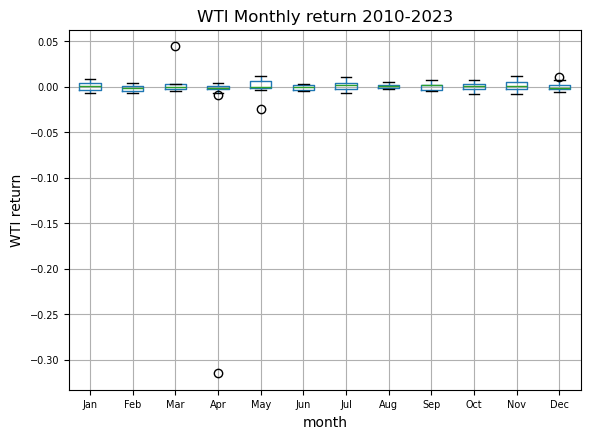

In [10]:
wti_monthly_return_list.boxplot(column='monthly_return', by='month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['Jan','Feb','Mar','Apr','May','Jun',\
        'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(labels)
ax.set_ylabel('WTI return')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title("WTI Monthly return 2010-2023")

plt.suptitle("")
plt.show()

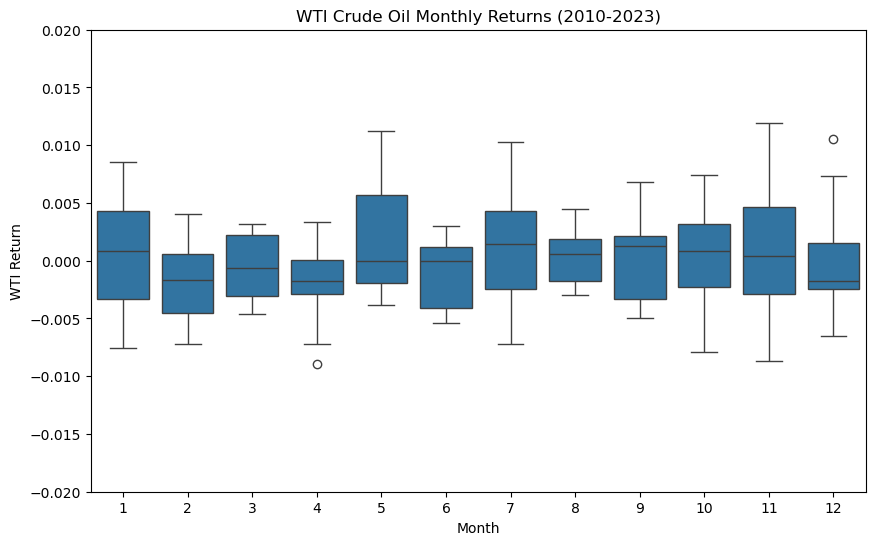

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))  # Đặt kích thước figure
sns.boxplot(x='month', y='monthly_return', data=wti_monthly_return_list)
plt.ylim(-0.02, 0.02)  # Đặt giới hạn trục y
plt.xlabel('Month')
plt.ylabel('WTI Return')
plt.title('WTI Crude Oil Monthly Returns (2010-2023)')
plt.show()

- Giá của cổ phiếu biến đổi theo tháng tương đối ổn định, vào tháng tư có có các điểm outlier lớn

# Rolling statistic và Stationary trong kiểu dữ liệu Time Series 


## Kiểu dữ liệu trong Time series 
- Stationary time series (chuỗi thời gian đứng yên) là kiểu dữ liệu có mean và variance là cố định, không thay đổi theo thời gian (hoặc sự thay đổi là nhỏ)
- Ngược lại Non-stationary time series là kiểu dữ liệu có mean và variance thay đổi lớn, phụ thuộc vào thời gian. Ta có thể biến kiểu dữ liệu này thành Stationary bằng cách sử dụng các phương pháp như: detrending, differencing

![Local Image](../Image/99388Stationary%20Vs%20Non-Stationary.png)

## Rolling statistic 
- Một cách để chuyển dữ liệu từ không đứng yên thành kiểu dữ liệu đứng yên (stationary) đó là sử dụng phương pháp Rolling statistic - tính MA với một window_size được định nghĩa trước

# Reference 
- [Time Series Analysis and Forecasting | Data-Driven Insights (Updated 2024)](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/)